In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('housing.csv')

In [77]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [79]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
df.shape

(20433, 10)

In [237]:
X=df.iloc[:,[0,1,7]]

In [238]:
y = df['median_income']

In [239]:
cols = X.columns

In [240]:
y

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20433, dtype: float64

In [153]:
#from sklearn.preprocessing import LabelEncoder

In [154]:
#le = LabelEncoder()

In [155]:
#X['ocean_proximity']= le.fit_transform(X['ocean_proximity'].values)

In [156]:
#y = le.fit_transform(y.values)

In [157]:
#from sklearn.preprocessing import MinMaxScaler

#ms = MinMaxScaler()

#X = ms.fit_transform(X)

In [158]:
#X = pd.DataFrame(X, columns=[cols])

In [241]:
X

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


In [242]:
from sklearn.cluster import KMeans

In [243]:

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

In [244]:
cs

[248976.44411388622,
 99969.27643480465,
 72670.75835193074,
 55926.725771843805,
 46701.93251277802,
 39095.87126675605,
 34349.831012473056,
 30426.04980230534,
 27387.165331622546,
 24986.162060027364]

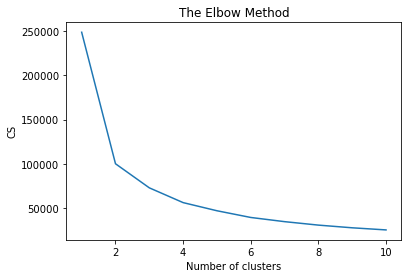

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [262]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 6 out of 20433 samples were correctly labeled.
Accuracy score: 0.00


In [263]:
X["Cluster"] = kmeans.fit_predict(X)

<ipython-input-263-c1f77d118365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X)


In [264]:
X["Cluster"] = X["Cluster"].astype('category')

<ipython-input-264-98f6c039a759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype('category')


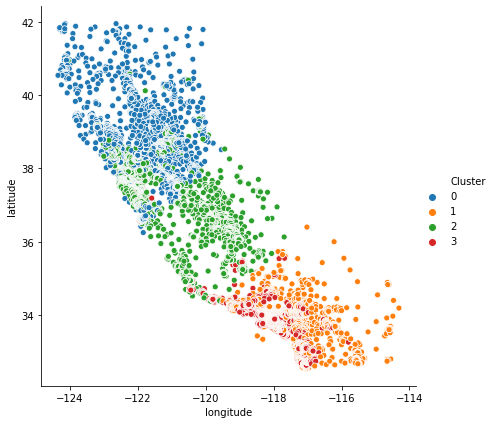

In [265]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

In [304]:
J = df.iloc[:,[3,5,7]]

In [306]:
cols =J.columns

In [307]:
l=df['median_income']

In [308]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

J = ms.fit_transform(J)

In [309]:
J= pd.DataFrame(J, columns=[cols])

In [310]:
ks = []
for i in range(1, 11):
    kmns = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmns.fit(J)
    ks.append(kmns.inertia_)

In [311]:
ks

[434.2739062954344,
 224.42513423764152,
 157.3500711330836,
 124.81341907554204,
 94.96508139777384,
 79.08892229999077,
 68.13335808094338,
 60.098429260673335,
 54.39572143446768,
 49.6368739217991]

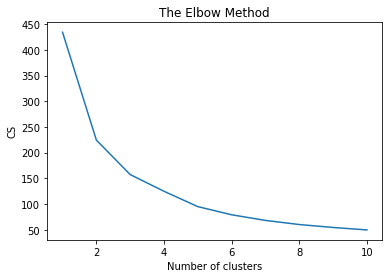

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), ks)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [313]:
kmns = KMeans(n_clusters=6, random_state=0)

kmns.fit(J)

# check how many of the samples were correctly labeled
labels = kmns.labels_

correct_labels = sum(l == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, l.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(l.size)))

Result: 36 out of 20433 samples were correctly labeled.
Accuracy score: 0.00


<ipython-input-299-048c7b6a95b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  J["Cluster"] = J["Cluster"].astype('category')


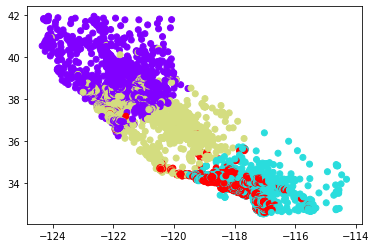

In [317]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmeans.labels_,cmap='rainbow')


